In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz

In [4]:
df = pd.read_csv('car_evaluation.csv', header = None)

In [5]:
df.shape
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [9]:
from sklearn.preprocessing import LabelEncoder


label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':  # 범주형 데이터만 변환
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])

In [13]:
df.head()

,0,1,2,3,4,5,6
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [14]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=42)
clf.fit(x_train, y_train)

y_pred  = clf.predict(x_test)


clf_accuracy = accuracy_score(y_test, y_pred)


In [16]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

rf_accuracy = accuracy_score(y_test, y_pred)

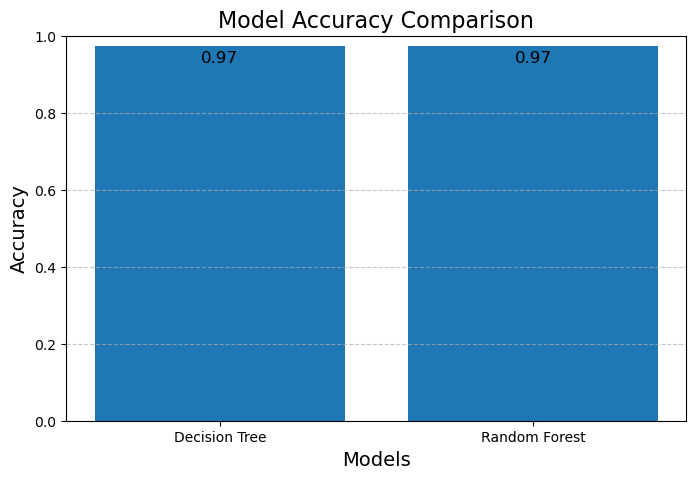

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 5))

accuracies = [clf_accuracy, rf_accuracy]

bars = plt.bar(['Decision Tree', 'Random Forest'], [clf_accuracy, rf_accuracy])
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05,
             f"{accuracy:.2f}", ha='center', va='bottom', fontsize=12, color='black')

# 그래프 꾸미기
plt.ylim(0, 1.0)  # 정확도 범위: 0 ~ 1
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

clf_cm = confusion_matrix(y_test, clf.predict(x_test))
rf_cm = confusion_matrix(y_test, rf.predict(x_test))

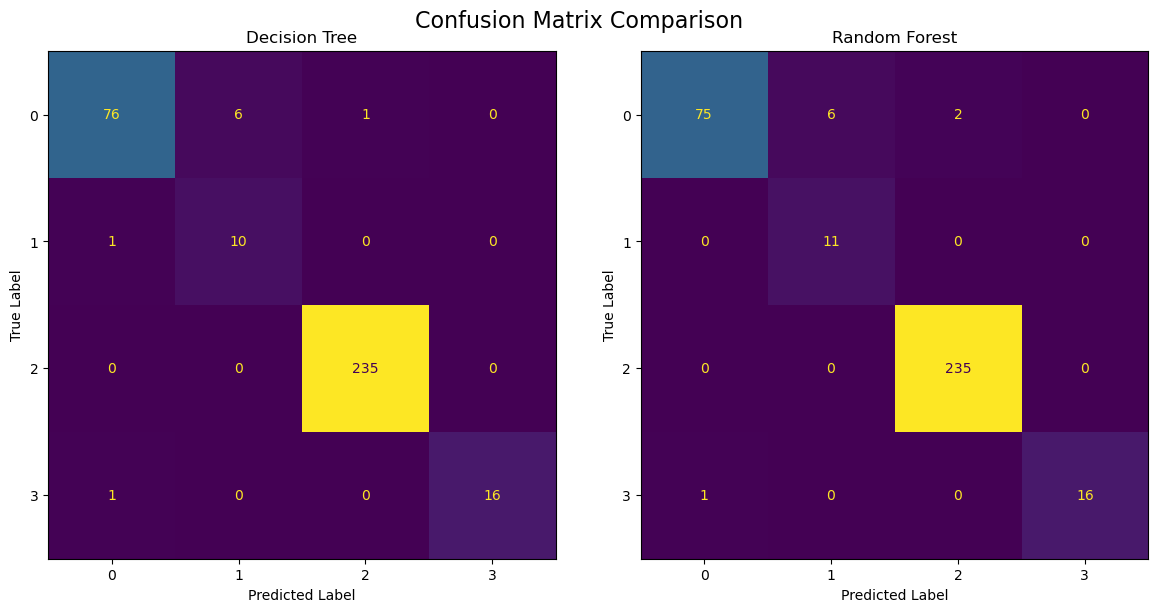

In [19]:
#데이터 시각화

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Confusion Matrix Comparison', fontsize=16)

# Decision Tree Confusion Matrix
disp_clf = ConfusionMatrixDisplay(confusion_matrix=clf_cm, display_labels=np.unique(y_test))
disp_clf.plot(ax=axes[0], colorbar=False)
axes[0].set_title('Decision Tree')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Random Forest Confusion Matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=np.unique(y_test))
disp_rf.plot(ax=axes[1], colorbar=False)
axes[1].set_title('Random Forest')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

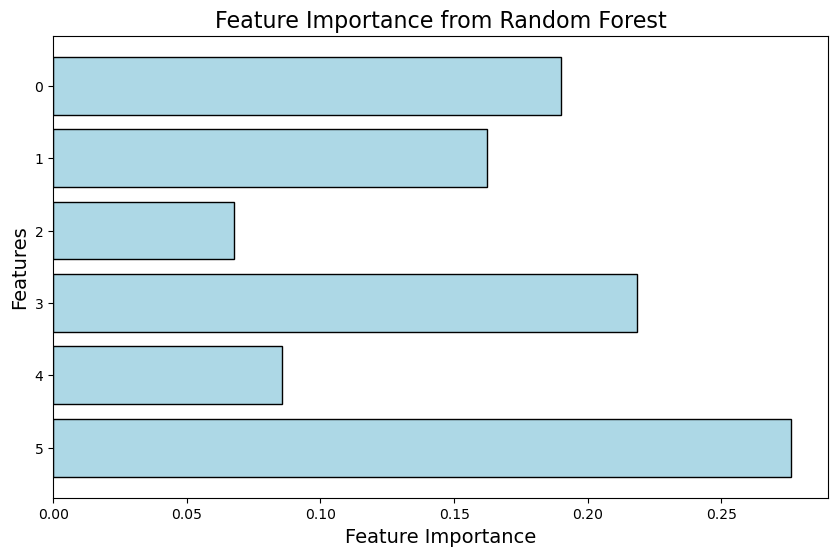

In [20]:
feature_importances = rf.feature_importances_
feature_names = X.columns

# 특성 중요도를 정렬
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_idx]
sorted_features = feature_names[sorted_idx]

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='lightblue', edgecolor='black')
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importance from Random Forest', fontsize=16)
plt.gca().invert_yaxis()  # 가장 중요한 특성이 위로 오도록 정렬
plt.show()